# Rules: 
### 1. Whenever number of todo reaches 10, Complete minimum of 5 todos.
### 2. Write Comments
### 3. Use Type Checked Function
### 4. Write Tests
### 5. Always write links in start of cell


# All TODO's Here

1. Write Tests for activation functions
2. Write generalized function for function ploting
3. Read about Calculas theorem about composite function. [Nested Function](#calculas_theorem)
4. Fix the Nested Functions with inner function more than one argument( no default)
5. Write General function for chain rule
6. Check about vactor to scalar conversion functions. (Maybe Dot Product?)
7. Check Chapter one again. (Later)

## Functions:
* Funtions take input and produce a output
* Two exampple of functions are:
* * $ {f_1(x)} = {x^{2}} $
* * $ {f_2(x)} = {max(x,0)} $
* * $ {f_3(x)} = {max({\alpha}*x,x)} $

In [1]:
# Let us do all the imports here (Direct import later, specific import on top):
from typing import List, Callable, Tuple
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Lets define input for these functions:
INPUT_RANGE = np.arange(-3,3,0.01)

In [3]:
# Lets define the function's here
def square_func(x: np.ndarray) -> np.ndarray:
    """
    This function's :
    * Input :  array of numbers:
    * Output:  array of numbers, each raise to power 2
    """
    
    return np.power(x,2)

In [4]:
# Let's test this function : 
input_array = [2,4,6]
output_array = [4,16,36]
solution = square_func(input_array)

np.testing.assert_array_equal(output_array, solution, "Array not equal")


In [5]:
# Lets define second function here
def maximum_func(x:np.ndarray) -> np.ndarray:
    '''
    This function's:
    * Input  : Array of nuumbers:
    * Output  : Array of numbers, each max of 0 or x
    '''
    
    return np.maximum(x,0)

In [6]:
# Lets test this function here
input_array = [2,-4, 10, 0]
output_array = [2,0,10,0]
solution = maximum_func(input_array)

np.testing.assert_array_equal(output_array, solution, "Array not equal")

In [7]:
# Let's define sigmoid function here:
def sigmoid(input_ : np.ndarray) -> np.ndarray:
    """
     Apply the Signoid Function to each element in input ndarray
    """
    return 1 / (1 + np.exp(-input_))

#### There is Difference is np.max and np.maximum:
* np.max() -> return maximum element in the vector passed as input
* np.maximum(x,y) -> returns maximum of x or y 

In [8]:
# Lets define third function here:
def leaky_relu_func( x: np.ndarray, alpha: float = 0.2,) -> np.ndarray:
    '''
    This is the implementation of the leaky relu function.
    
    @TODO: TEsting this function
    
    input: alpha:float, vector of numbers
    output: vector of number each with maximum of (alpha * input, input)
    '''
    return np.maximum(alpha*x, x)


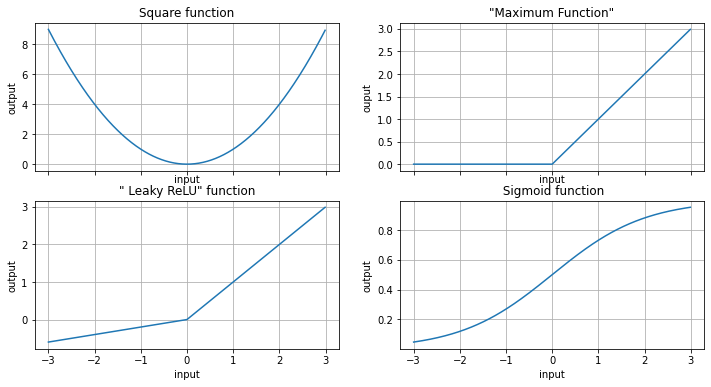

In [9]:
# Let's Plot these functions Here!!

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax1.plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax1.set_title('Square function')
ax1.set_xlabel('input')
ax1.set_ylabel('output')
ax1.grid(True)

ax2.plot(INPUT_RANGE,maximum_func(INPUT_RANGE))
ax2.set_title('"Maximum Function"')
ax2.set_xlabel('input')
ax2.set_ylabel('ouput')
ax2.grid(True)


ax3.plot(INPUT_RANGE, leaky_relu_func(INPUT_RANGE))
ax3.set_title('" Leaky ReLU" function')
ax3.set_xlabel('input')
ax3.set_ylabel('output');
ax3.grid(True)

ax4.plot(INPUT_RANGE, sigmoid(INPUT_RANGE))
ax4.set_title(' Sigmoid function')
ax4.set_xlabel('input')
ax4.set_ylabel('output');
ax4.grid(True)

<a id='calculas_theorem'></a>
## Nested Functions or Composite Functions

* Functions can be nested to form composite functions
* For example: 
*  * If we have two functions $ {f_1} $ and  $ {f_2} $ and output of one function becomes input of second function, we call that **nested function**.  
* $ {y} = {f_1( f_2 (x) )} $
* Nested Functions are 
*  * read **from the outside in** but,
*  * operations are performed **from the inside out**.
* Above function will be read as : 
*  * **F 1 of F 2  of x**
*  * But it will be evaluated as: 
*  * Apply $ f_2 $ to x then apply $ f_1 $ to the result of it.

### Notes:
* A theorem in calculas tells us that,
*  * a composite function made up of "mostly differentiable" functions
*  * is itself mostly differentiable.


In [10]:
# Defining Datatypes required  for nested functions: 

# A function that takes in ndarray as an argument and produces an ndarray
Array_Function = Callable[[np.ndarray], np.ndarray]

# A chain is a list of functions
Chain = List[Array_Function]


In [11]:
def nested_len_2(chain: Chain,
                arr: np.ndarray) -> np.ndarray :
    """
       Takes two functions and evaluates them in row,
       i.e in a "Chain" or as in "nested"
    """
    
    # Lets check whether the length of chain is 2 or not
    assert len(chain) ==  2, "Length of input `chain` should be 2"
    
    f_1 = chain[0]
    f_2 = chain[1]
    
    #HACK 
#     try:
#         answer = f_2(f_1(arr))
#     except TypeError: 
#         answer = f_2(f_1(0.1,arr))
    
    # JUST USE LAMBDA IN CALLING THIS FUNCTION INSTEAD OF USING THIS TYPE OF HACK  
    
    return f_2(f_1(arr))

In [12]:
def nested_len_3(chain: Chain, arr: np.ndarray) -> np.ndarray:
    """
        Takes three function and evaluate then in row
    """
    assert len(chain) == 3 , " Length of input 'chain' should be 3"
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    return f3(f2(f1(arr)))

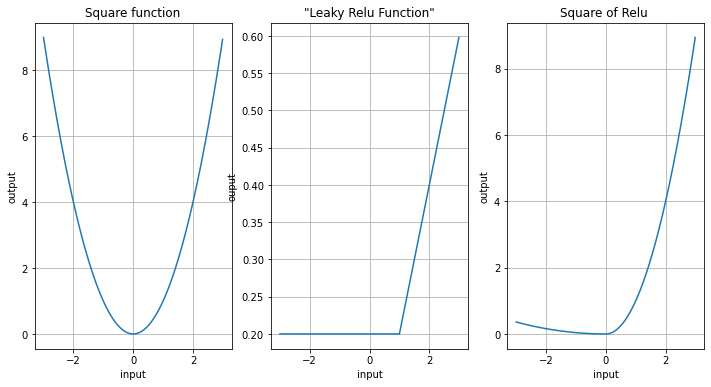

In [13]:
# Lets Square the LeakyRelu Function

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax[0].plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].grid(True)

ax[1].plot(INPUT_RANGE, leaky_relu_func(0.2,INPUT_RANGE))
ax[1].set_title('"Leaky Relu Function"')
ax[1].set_xlabel('input')
ax[1].set_ylabel('ouput')
ax[1].grid(True)


ax[2].plot(INPUT_RANGE, nested_len_2([leaky_relu_func, square_func], INPUT_RANGE) )
ax[2].set_title('Square of Relu ')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');
ax[2].grid(True)


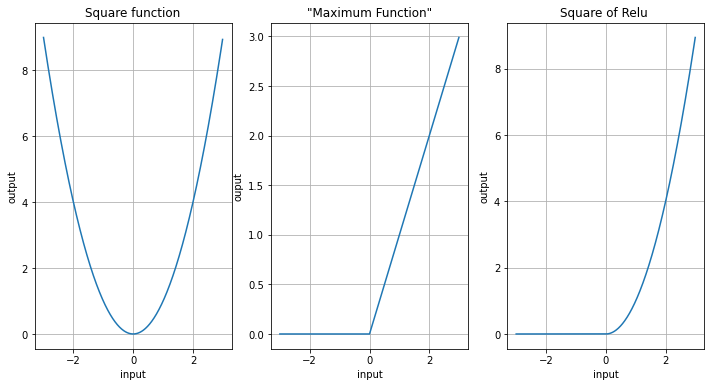

In [14]:
# Lets Square the Relu Function

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax[0].plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].grid(True)

ax[1].plot(INPUT_RANGE, maximum_func(INPUT_RANGE))
ax[1].set_title('"Maximum Function"')
ax[1].set_xlabel('input')
ax[1].set_ylabel('ouput')
ax[1].grid(True)


ax[2].plot(INPUT_RANGE, nested_len_2([maximum_func,square_func], INPUT_RANGE) )
ax[2].set_title('Square of Relu ')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');
ax[2].grid(True)


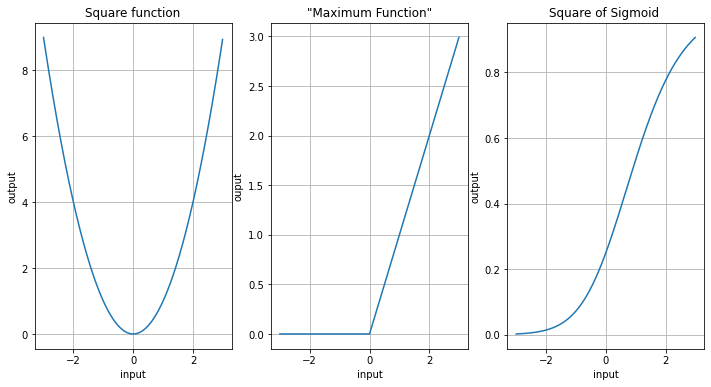

In [15]:
# Lets Square the Sigmoid Function

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax[0].plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].grid(True)

ax[1].plot(INPUT_RANGE, maximum_func(INPUT_RANGE))
ax[1].set_title('"Maximum Function"')
ax[1].set_xlabel('input')
ax[1].set_ylabel('ouput')
ax[1].grid(True)


ax[2].plot(INPUT_RANGE, nested_len_2([sigmoid,square_func], INPUT_RANGE) )
ax[2].set_title('Square of Sigmoid ')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');
ax[2].grid(True)

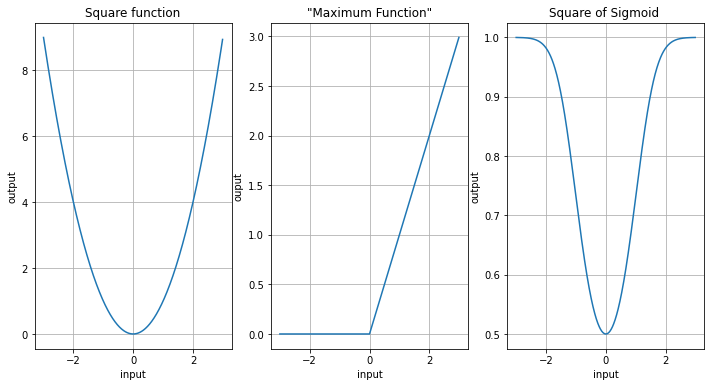

In [16]:
# Lets Sigmoid the Square Function

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax[0].plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].grid(True)

ax[1].plot(INPUT_RANGE, maximum_func(INPUT_RANGE))
ax[1].set_title('"Maximum Function"')
ax[1].set_xlabel('input')
ax[1].set_ylabel('ouput')
ax[1].grid(True)


ax[2].plot(INPUT_RANGE, nested_len_2([square_func, sigmoid], INPUT_RANGE) )
ax[2].set_title('Square of Sigmoid ')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');
ax[2].grid(True)

## Derivatives
* Derivative of a function **at a point** is the: 
*  * **rate of change** of the output of the function with respect to its input at that point
* We can define this as:
*  * How much the output of the function changes  as we change its input at a particular value **a** with limit
*  *  $$ \frac{df}{dx}(a) = \lim_{\Delta \to 0} \frac{f(a + \Delta) - f(a - \Delta)}{2 \ *  \ \Delta} $$
* For Numerical Computation, we can set the value of $\Delta$ to very small to zero 
*  *  For example: $ {\Delta}$ = 0.0001
*  *  So the equation will be: 
*  *  $$ \frac{df}{dx}(a) = \frac{f(a+0.0001) - f(a-0.0001)}{2*0.0001} $$


In [17]:
def derivate(func : Callable[[np.ndarray], np.ndarray],
            input_ : np.ndarray,
            delta : float = 0.0001) -> np.ndarray:
    """
        Given a function :func, and input array :input_,
        this function calculates the derivative of the function at all
        the points in input array using delta.
        The value of delta is 0.0001 (default).
        Extra parameter of delta can be provided.
    """
    
    return (func(input_ + delta) -  func(input_ - delta)) / (2 * delta)
    

In [18]:
?plt.subplots

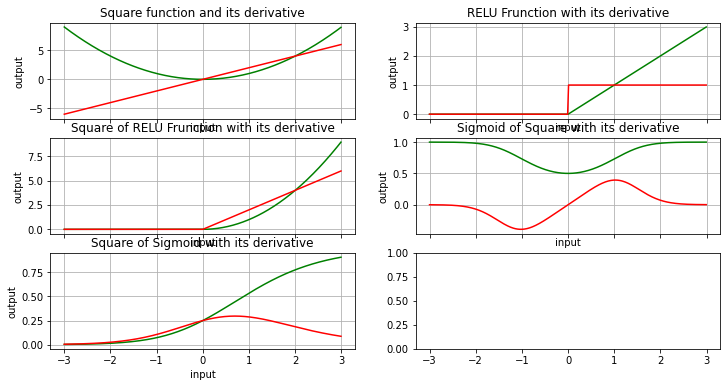

In [19]:
# Graph of functions with their derivative

fig, ((ax1, ax2),(ax3, ax4),(ax5, _)) = plt.subplots(3, 2, sharex = True, figsize = (12, 6)) # 1 Row, 3 Col

ax1.plot(INPUT_RANGE, square_func(INPUT_RANGE), 'g')
ax1.plot(INPUT_RANGE, derivate(square_func, INPUT_RANGE), 'r')
ax1.set_title('Square function and its derivative')
ax1.set_xlabel('input')
ax1.set_ylabel('output')
ax1.grid(True)

ax2.plot(INPUT_RANGE, maximum_func(INPUT_RANGE), 'g')
ax2.plot(INPUT_RANGE, derivate(maximum_func, INPUT_RANGE), 'r')
ax2.set_title('RELU Frunction with its derivative')
ax2.set_xlabel('input')
ax2.set_ylabel('output')
ax2.grid(True)

# Derivative wihtout chain rule
ax3.plot(INPUT_RANGE, nested_len_2([maximum_func, square_func], INPUT_RANGE), 'g')
ax3.plot(INPUT_RANGE, derivate(lambda x: nested_len_2([maximum_func,square_func], x), INPUT_RANGE), 'r') 
ax3.set_title('Square of RELU Frunction with its derivative')
ax3.set_xlabel('input')
ax3.set_ylabel('output')
ax3.grid(True)

# Derivative wihtout chain rule
ax4.plot(INPUT_RANGE, nested_len_2([square_func, sigmoid], INPUT_RANGE) , 'g')
ax4.plot(INPUT_RANGE, derivate(lambda x: nested_len_2([square_func, sigmoid], x), INPUT_RANGE), 'r') 
ax4.set_title('Sigmoid of Square with its derivative')
ax4.set_xlabel('input')
ax4.set_ylabel('output')
ax4.grid(True)

# Derivative wihtout chain rule
ax5.plot(INPUT_RANGE, nested_len_2([sigmoid, square_func], INPUT_RANGE) , 'g')
ax5.plot(INPUT_RANGE, derivate(lambda x: nested_len_2([sigmoid, square_func], x), INPUT_RANGE), 'r') 
ax5.set_title('Square of Sigmoid with its derivative')
ax5.set_xlabel('input')
ax5.set_ylabel('output')
ax5.grid(True)

 TIME START : 03:43
 
 NET NOT WORKIN
 
 TIME START AGAIN : 03:46


## The Chain Rule
* Mathematical theorem that lets us compute derivatives of composite functions.
* For example
*  $ y = f_1(f_2(x)) \tag{1} $
*  $$ \frac{dy}{dx} = \frac{df_1(f_2(x))}{df_2(x)} * \frac{df_2(x)}{dx}  \tag{2} $$
* This can solved independently as:
*  $ Let \space u = f_2(x) \tag{3} $
*  $ \frac{du}{dx} = \frac{df_2(x)}{dx} \tag{4}$
*  * Equation (1) can be written as : $ y = f_1(u) $
*  Therefore,
*  $ \frac{dy}{dx} = \frac{df_1}{du} * \frac{du}{dx} \tag{5}$
* And Equation (4) can be put into Equation(5)

In [20]:
def chain_derive_len_2(chain: Chain, input_: np.ndarray) -> np.ndarray:
    """
        Using Chain rule to compute the derivative of two nested function
    """
    
    assert len(chain) == 2, "Length of 'chain' should be 2 "
    assert input_.ndim == 1, "Function requires 1 dimensional ndarray as input_ "
    
    f1 = chain[0]
    f2 = chain[1]
    
    u: np.ndarray = f1(input_)
    d_u : np.ndarray = derivate(f1, input_)
        
    f2_ : np.ndarray = f2(u)
    d_f2 : np.ndarray = derivate(f2, u)
        
    return d_f2 * d_u
    

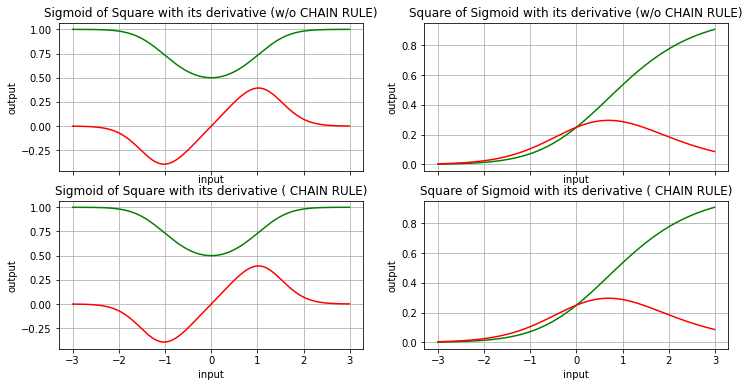

In [21]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex = True, figsize = (12, 6)) # 1 Row, 3 Col

# Derivative wihtout chain rule
ax1.plot(INPUT_RANGE, nested_len_2([square_func, sigmoid], INPUT_RANGE) , 'g')
ax1.plot(INPUT_RANGE, derivate(lambda x: nested_len_2([square_func, sigmoid], x), INPUT_RANGE), 'r') 
ax1.set_title('Sigmoid of Square with its derivative (w/o CHAIN RULE)')
ax1.set_xlabel('input')
ax1.set_ylabel('output')
ax1.grid(True)

# Derivative wihtout chain rule
ax2.plot(INPUT_RANGE, nested_len_2([sigmoid, square_func], INPUT_RANGE) , 'g')
ax2.plot(INPUT_RANGE, derivate(lambda x: nested_len_2([sigmoid, square_func], x), INPUT_RANGE), 'r') 
ax2.set_title('Square of Sigmoid with its derivative (w/o CHAIN RULE)')
ax2.set_xlabel('input')
ax2.set_ylabel('output')
ax2.grid(True)

# Derivative with chain rule
ax3.plot(INPUT_RANGE, nested_len_2([square_func, sigmoid], INPUT_RANGE) , 'g')
ax3.plot(INPUT_RANGE, chain_derive_len_2([square_func, sigmoid], INPUT_RANGE), 'r') 
ax3.set_title('Sigmoid of Square with its derivative ( CHAIN RULE)')
ax3.set_xlabel('input')
ax3.set_ylabel('output')
ax3.grid(True)

# Derivative wiht chain rule
ax4.plot(INPUT_RANGE, nested_len_2([sigmoid, square_func], INPUT_RANGE) , 'g')
ax4.plot(INPUT_RANGE, chain_derive_len_2([sigmoid, square_func], INPUT_RANGE), 'r') 
ax4.set_title('Square of Sigmoid with its derivative ( CHAIN RULE)')
ax4.set_xlabel('input')
ax4.set_ylabel('output')
ax4.grid(True)

In [22]:
def chain_derive_len_3(chain: Chain, input_: np.ndarray) -> np.ndarray:
    """
        Deriving chain rul for three function
    """
    
    assert len(chain) == 3 , "This function requires 'chain' of three objects "
    assert input_.ndim == 1, "Input dimenstion should be one as input_ "
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    u: np.ndarray = f1(input_)
    v: np.ndarray = f2(u)
    
    d_f3 = derivate(f3, v)
    d_f2 = derivate(f2, u)
    d_f1 = derivate(f1, input_)
    return d_f3*d_f2*d_f1

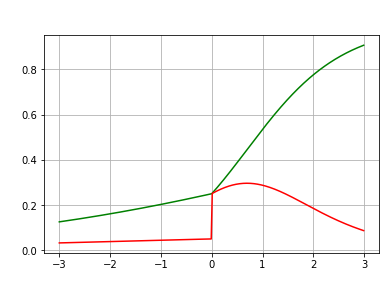

In [23]:
fig = plt.figure()
fig.suptitle('Square of Sigmoid of Leaky Relu', fontsize=20, color="white")
plt.plot(INPUT_RANGE, nested_len_3([leaky_relu_func, sigmoid, square_func], INPUT_RANGE),'g')
plt.plot(INPUT_RANGE, chain_derive_len_3([leaky_relu_func, sigmoid, square_func], INPUT_RANGE),'r')
plt.grid(True)
plt.xlabel('Input', color="white")
plt.ylabel('Output', color="white")
plt.show()

In [24]:
# Started 15:27


## Function with mutiple Inputs
* Sometimes Functions usually dont always have single input.
* They have several inputs that **at certain step** are multiplied or added together or any other operation.
* Let us take an example.
* Let alpha ( $\alpha$ ) be function which takes $ x $ and $ y $ as parameters and give $ x+y $ as result.
* $$ a = \alpha(x, y ) = x + y $$
* Then after this let the output of $\alpha$ be input of $\sigma$
* $$ s = \sigma(a)$$
*  $$ => s = \sigma(x+y)$$ 
* Entire Function as f :
* $$ f(x, y) = \sigma(x+y) $$

### NOTES:
* This Function does not operate element wise.
* Whenever we deal with operation that takes mutiple ndarrays as inputs, we have to chekc their shapes to ensure they meet whatever condition are required by that operation.

In [25]:
# Let us define the above function

def mutiple_input_add(x: np.ndarray, 
                      y: np.ndarray,
                      sigma: Array_Function) -> float:
    """
        Function with multiple inputs and addition.
    """
    
    assert x.shape == y.shape
    
    return sigma(x + y)

## Derivative of Function with multiple inputs.
* These are calculated by means of partial derivatives.
* For function $ f $ , we have to calculate partial derivatives according to x as well as y:
* $$ f(x, y ) = \sigma(x+y) $$
* First Derivate with respect to x:
* $$ \frac{\partial{f}}{\partial{x}} =  \frac{\partial{\space\sigma(\alpha(x, y))}}{\partial{\space \alpha(x, y)}} * \frac{\partial{\space \alpha(x, y)}}{\partial{x}}$$
* $$ \frac{\partial{f}}{\partial{y}} =  \frac{\partial{\space\sigma(\alpha(x, y))}}{\partial{\space \alpha(x, y)}} * \frac{\partial{\space \alpha(x, y)}}{\partial{y}}$$
* Also,
* $$ \frac{\partial{\space \alpha(x, y)}}{\partial{x}} = 1  $$
* As $ \frac{\partial{\alpha}}{\partial{x}} = \frac{\partial{(x + y)}}{\partial{x}} = 1 $ 
* And same for y


In [26]:
def mutiple_inputs_add_backward(x: np.ndarray,
                               y: np.ndarray,
                               sigma: Array_Function) -> Tuple[float, float]:
    """
        Computes the derivative of this simple function with respect to both inputs.
    """
    # Compute the 'forward pass'
    a = x + y
    
    # Compute the derivative with respect to a
    dsda = derivate(sigma, a)
    
    # Dertivativeof alpha with respect to x and y is 1 (for x + y like func)
    dadx, dady = 1, 1
    
    return dsda * dadx, dsda * dady
    

In [27]:
# Break 16:17
# Start 19:08

## Derivatives of Functions with Multiple Vector Inputs
* What does " derivative with respect to matrix" mean?
* Matrix Syntax is just shorthand for bunch of numbers arranged in particular form.
* So "derivative with respect to matrix" really means " derivatice with respect to each element of the matrix ".
* Let us take an example: 
* $$ N = v(X, W) $$
* where function $ v $  is the dot product of X and W, and $ X $ and $ W $ is a vector.
* $$ \frac{\partial{v}}{\partial{X}} = \begin{bmatrix} \frac{\partial{v}}{\partial{x_1}} &  \frac{\partial{v}}{\partial{x_2}} & \frac{\partial{v}}{\partial{x_3} } \end{bmatrix} $$
* This is known as Gradient of X.
* The idea is that for an individual element of X say : $ x_3 $, the corresponding element in dnDx is the partial derivative of the output of the vector dot product N with respect to $ x_3 $ 
* **Gradient** simply refers to multidimensional analogue of the partial derivative.
* Specifically, it is an array of partial derivatives of the output of a function with respect to each element of the input to that function.

### NOTES:
* [How to Derivate with respect to vector. (PART 1)](https://www.youtube.com/watch?v=iWxY7VdcSH8)
* [How to Derivate with respect to vector. (PART 2)](https://www.youtube.com/watch?v=uoejt0FCWWA)
* [How to Derivate with respect to vector. (PART 3)](https://www.youtube.com/watch?v=i6fqfH5hx60)



In [28]:
def matmul_backward_first(X: np.ndarray,
                          W: np.ndarray) -> np.ndarray:
    """
        Computes the backward pass of matrix multiplication wiht respect to first argument.
    """
    
    # backward pass
    dNdX = np.transpose(W, (1, 0))
    
    return dNdX


In [29]:
# break 19:42
# start 23:46

In [30]:
def matrix_forward_extra(X: np.ndarray,
                        W: np.ndarray,
                        sigma: Array_Function) -> np.ndarray:
    """
        Computes the forward pass of a function involving matrix multiplication.
        one extra function
    """
    assert X.shape[1] ==  W.shape[0]
    
    # matrix multiplication
    N = np.dot(X, W)
    
    # feeding the ouput of matrix mutiplication thorugh sigma
    S = sigma(N)
    
    return S


In [31]:
def matrix_function_backward_1(X: np.ndarray,
                              W: np.ndarray,
                              sigma: Array_Function) -> np.ndarray:
    '''
        Computes the derivative of our matrix function with respecct to the first element.
    '''
    
    assert X.shape[1] == W.shape[0]
    
    #matrix multiplication
    N = np.dot(X, W)
    
    # feeding the ouput of the matrix mutiplication though sigma
    S = sigma(N)
    
    # backward calculation
    dSdN = derive(sigma, N)
    
    # dNdX
    dnDx = np.transpose(W, (1, 0))
    
    # Multiply them together: since dNdX is 1x1, order doesn't matter
    return np.dot(dSdN, dNdX)



In [34]:
x = np.array([[ 0.4723  0.6151 -1.7262]])
w = np.array([[2],[1],[3]])    

matrix_forward_extra(x, w, sigmoid)

AssertionError: 

## Matrix Function Forward

In [40]:
def matrix_function_forward_sum(X : np.ndarray,
                               W: np.ndarray,
                               sigma: Array_Function) -> float:
    
    """
        Computing the result of forward pass of this 
        function with input ndaraay X and W and function sigma
    """
    
    assert X.shape[1] == X.shape[0]
    
    # matrix multiplication
    N = np.dot(X, W)
    
    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)
    
    L = np.sum(S)
    
    return L

## Matric Function Backward

* We can Write $ L $ as  $ \Lambda(\sigma(\nu(X, W))) $ 
* The partial dertivative of $ L $ wrt to $ X $ is: 
*  $$  \frac{\partial \Lambda}{\partial X}(X) =  \frac{\partial \nu}{\partial X}(X, W) x  \frac{\partial \sigma}{\partial u}(N) * \frac{\partial \Lambda}{\partial u}(S)  $$
* We could compute derivate of lambda w.r.t to x directly but the whole point of Chain Rule was to breakit down into simpler pieces.
* First Let's compute the derivate of $ S $ with respect to $ u $
* We want to know How much L ( the output of $ \Lambda  $ ) will increase3 if eah element of S increases. Since L is the sum of all the elements of S, this derivative is simply :
* $$  \frac{\partial \Lambda}{\partial u}(S) = \begin{bmatrix} 1 & 1 \\ 1 & 1 \\ 1 & 1 \end{bmatrix} $$


In [50]:
def matrix_function_backward_sum_1(X: np.ndarray, 
                                  W: np.ndarray,
                                  sigma: Array_Function) -> np.ndarray:
    
    """
        Compute Derivate of matrix function with a syum with 
        respect to the first matrix input
    """
    
    assert X.shape[1] == W.shape[0]
    
    # Matrix Multiplication
    N = np.dot(X, W)
    
    # feeding the ouput of the matrix multiplication through sigma
    S = sigma(N)
    
    # summ all the elements
    L = np.sum(S)
    
    # dldS - just one's
    dLdS = np.ones_like(S)
    
    # dSdN 
    dSdN = derivate(sigma, N)
    
    # dLdN
    dLdN = dLdS * dSdN
    
    #dNdX
    dNdX = np.transpose(W, (1, 0))
    
    
    # dLdX
    dLdX = np.dot(dSdN, dNdX)
    
    return dLdX

    
    

In [51]:
np.random.seed(190204)
X  = np.random.randn(3, 3)
W  = np.random.randn(3, 2)

print(round(matrix_function_forward_sum(X, W, sigmoid), 4))

2.3755


In [52]:
print(matrix_function_backward_sum_1(X, W , sigmoid))

[[ 0.24888872 -0.3747806   0.01121963]
 [ 0.12604152 -0.27807406 -0.13945839]
 [ 0.229928   -0.36623446 -0.02252593]]


In [58]:
print("X : ")
print(X)
print("\nL: ")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print("\ndLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X : 
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]

L: 
2.3755

dLdX:
[[ 0.24888872 -0.3747806   0.01121963]
 [ 0.12604152 -0.27807406 -0.13945839]
 [ 0.229928   -0.36623446 -0.02252593]]
